In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
car = pd.read_csv('CarPricePred.csv')

In [3]:
car.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [4]:
car.shape

(4345, 9)

In [5]:
print(f"Total Rows: {car.shape[0]}\nTotal Columns: {car.shape[1]}")

Total Rows: 4345
Total Columns: 9


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [7]:
car['Model'].value_counts()

E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: Model, Length: 312, dtype: int64

In [8]:
car.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [9]:
## There Are Miner Null Values In Data Set So We Have to Delete it
car = car.dropna()

In [10]:
car.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [12]:
# Statical Information Of Our Data
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4025.0,19552.308065,25815.734988,600.0,6999.0,11500.0,21900.0,300000.00
Mileage,4025.0,163.572174,103.394703,0.0,90.0,158.0,230.0,980.00
EngineV,4025.0,2.764586,4.935941,0.6,1.8,2.2,3.0,99.99
Year,4025.0,2006.379627,6.695595,1969.0,2003.0,2007.0,2012.0,2016.00


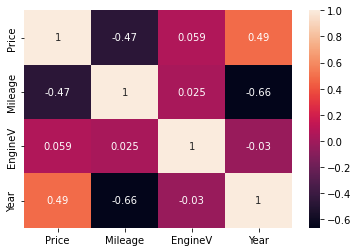

In [14]:
sns.heatmap(car.corr(),annot=True)
plt.show()

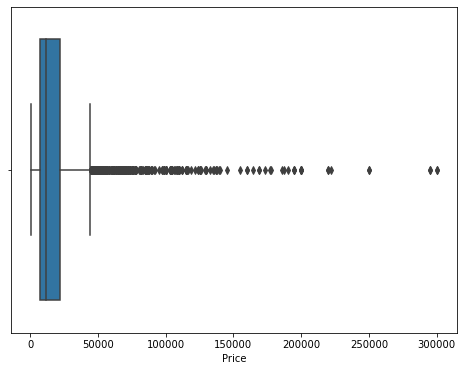

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x=car['Price'])
plt.show()

In [17]:
## checking Outlires

In [18]:
price_Q1 = car['Price'].quantile(0.25)
price_Q3 = car['Price'].quantile(0.75)

In [19]:
P_IQR = price_Q3-price_Q1

In [20]:
lower_limit = price_Q1-1.5*(P_IQR)
upper_limit = price_Q3+1.5*(P_IQR)

In [21]:
print(f'Lower Price -> {lower_limit}\nUpper Price-> {upper_limit}')

Lower Price -> -15352.5
Upper Price-> 44251.5


In [25]:
New_CarPrice = car[(car['Price']>lower_limit) & (car['Price']<upper_limit)]

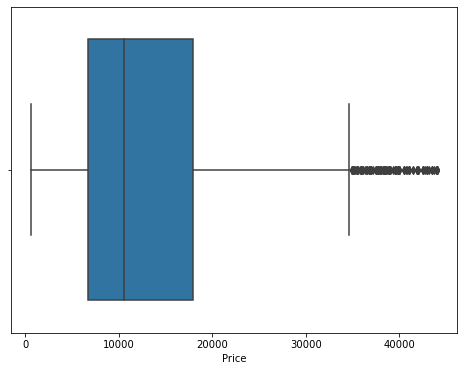

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_CarPrice['Price'])
plt.show()

In [28]:
New_CarPrice.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [29]:
## Checking Outlires In Mileage

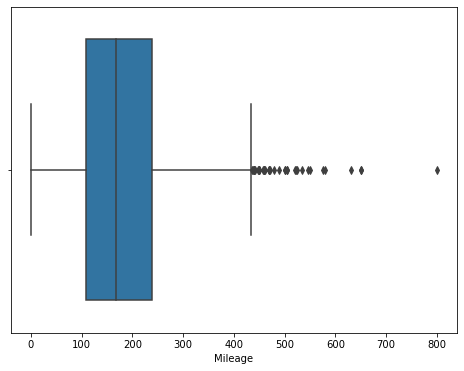

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_CarPrice['Mileage'])
plt.show()

In [30]:
mileage_Q1 = car['Price'].quantile(0.25)
mileage_Q3 = car['Price'].quantile(0.75)

In [31]:
Mile_IQR = mileage_Q3-mileage_Q1

In [32]:
lower_mileage = mileage_Q1-1.5*(Mile_IQR)
upper_mileage = mileage_Q3+1.5*(Mile_IQR)

In [33]:
print(f'Lower Price -> {lower_mileage}\nUpper Price-> {upper_mileage}')

Lower Price -> -15352.5
Upper Price-> 44251.5


In [34]:
New_Car_Mile = New_CarPrice[(New_CarPrice['Mileage']>lower_mileage) & (New_CarPrice['Mileage']<upper_mileage)]

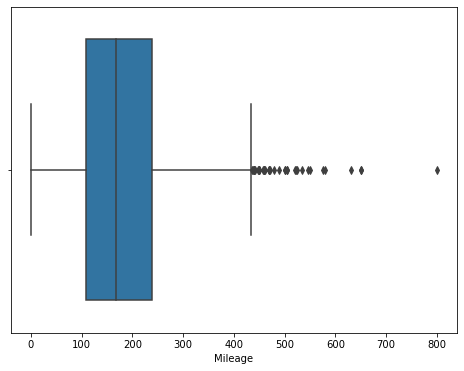

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_Car_Mile['Mileage'])
plt.show()

In [39]:
New_CarPrice['Mileage'].describe()

count    3670.000000
mean      175.567575
std        97.581022
min         0.000000
25%       108.000000
50%       168.000000
75%       238.000000
max       800.000000
Name: Mileage, dtype: float64

In [37]:
New_Car_Mile = New_CarPrice[(New_CarPrice['Mileage']<=400)]

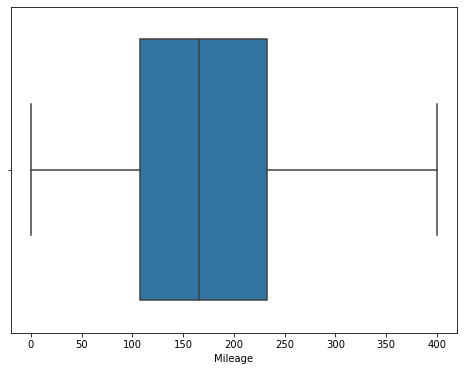

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_Car_Mile['Mileage'])
plt.show()

In [40]:
New_Car_Mile.sample()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2742,Mercedes-Benz,7000.0,other,260,2.2,Diesel,yes,2000,Vito


In [41]:
New_Car_Mile['EngineV'].describe()

count    3611.000000
mean        2.702858
std         5.192705
min         0.600000
25%         1.800000
50%         2.000000
75%         2.800000
max        99.990000
Name: EngineV, dtype: float64

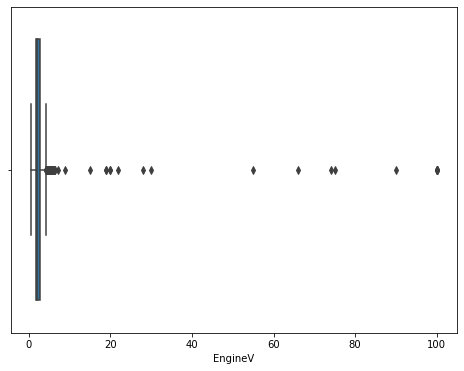

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_Car_Mile['EngineV'])
plt.show()

In [49]:
New_CarEng = New_Car_Mile[(New_Car_Mile['EngineV']<=2.80) & (New_Car_Mile['EngineV']>0.70)]

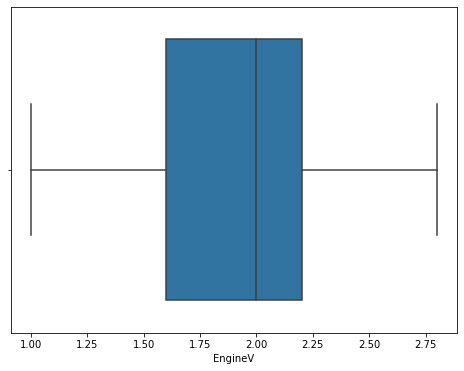

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x=New_CarEng['EngineV'])
plt.show()

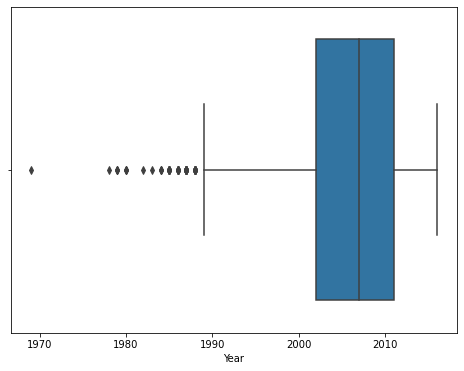

In [55]:
## Checking Outlire In Year Columns
plt.figure(figsize=(8,6))
sns.boxplot(x=New_CarEng['Year'])
plt.show()

In [56]:
New_YearData = New_CarEng[(New_CarEng['Year']>1990)]

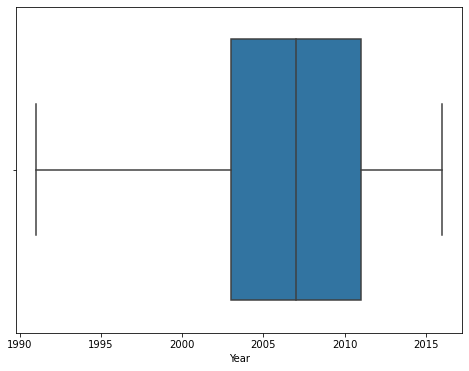

In [57]:
## Checking Outlire In Year Columns
plt.figure(figsize=(8,6))
sns.boxplot(x=New_YearData['Year'])
plt.show()

In [58]:
New_YearData.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


In [61]:
## dropping Model columns From Data Set, coz We Dont Need it
New_YearData = New_YearData.drop('Model',axis=1)

In [62]:
New_YearData.sample()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4263,BMW,5900.0,vagon,220,2.8,Petrol,yes,1995


In [63]:
## Creating dummies through pandas
df = pd.get_dummies(data=New_YearData,columns=['Brand','Body','Engine Type','Registration'])

In [65]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [66]:
df.head(2)

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


# Fetching Some More Information Through Pandas Profiling...For Better Understand

In [68]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title='Pandas_Profiling',explorative=True)

In [69]:
profile.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
profile.to_file('output.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Training DataSet through train_Test_Split

In [71]:
x = df.drop('Price',axis=1)

In [72]:
y = df['Price']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [74]:
x_train.shape, y_train.shape

((1974, 22), (1974,))

In [76]:
x_test.shape,y_test.shape

((659, 22), (659,))

# creating Model With PipeLine

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [79]:
LinReg_Pipe = Pipeline([('Lin_Reg',LinearRegression())])
DecReg_Pipe = Pipeline([('Dec_Reg',DecisionTreeRegressor())])
RenReg_Pipe = Pipeline([('Ren_Reg',RandomForestRegressor())])

In [80]:
MyPipeLine = [LinReg_Pipe,DecReg_Pipe,RenReg_Pipe]

In [81]:
Accuracy = 0.0
Classifire = 0
PipeLine = ''

In [82]:
Pipe_Dict = {0:'LinearRegression',1:'DecisionTreeRegressor',2:'RandomForestRegressor'}

In [83]:
for MyPipe in MyPipeLine:
    MyPipe.fit(x_train,y_train)

# Fetching Score

In [84]:
for i,model in enumerate(MyPipeLine):
    print(f"Test Accuracy {Pipe_Dict[i],model.score(x_test,y_test)}")

Test Accuracy ('LinearRegression', 0.7187866189873161)
Test Accuracy ('DecisionTreeRegressor', 0.7620594883744278)
Test Accuracy ('RandomForestRegressor', 0.8636329813830874)


# Fethching Best Model

In [91]:
for i,model in enumerate(MyPipeLine):
    if model.score(x_test,y_test)>Accuracy:
        Accuracy=model.score(x_test,y_test)
        Classifire = i
        PipeLine = model
print(f"Here Is The Best Model For This Algo\n\n{Pipe_Dict[Classifire]}()\nWith 86.36% Accuracy")

Here Is The Best Model For This Algo

RandomForestRegressor()
With 86.36% Accuracy


# Saving Model

In [92]:
import joblib

In [93]:
joblib.dump(RandomForestRegressor,'Save_Model')

['Save_Model']